In [42]:
import numpy as np
from scipy.interpolate import BSpline
from scipy.signal import convolve
import matplotlib.pyplot as plt

In [63]:
x = np.linspace(-4, 4, 1000)

0.25206266648742764
0.28704105643000805
0.3215610414036047


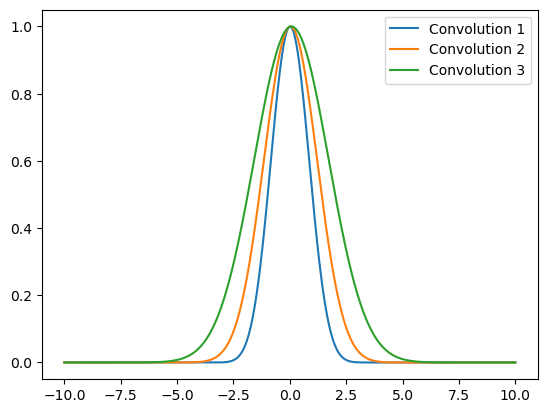

In [88]:
x = np.linspace(-10,10, 1000)

def bspline(x):
    # from https://en.wikipedia.org/wiki/B-spline#/media/File:Cardinal_cubic_B-spline2.svg
    knots = np.array([-2, -2, -2, -2, -1, 0, 1, 2, 2, 2, 2])
    coeffs = np.array([0, 0, 0, 6, 0, 0, 0])
    b = BSpline(knots, coeffs, 3)

    return np.where((-2.0 <= x) & (x <= 2.0), b(x), 0)/4

b = bspline(x)

fig, ax = plt.subplots()

# ax.plot(x, b, label='B-spline')

for i in range(3):
    b = np.convolve(b, b, mode='same')
    b /= np.max(b)
    print(np.std(b))
    # b /= np.std(b)
    # print(np.std(b))

    ax.plot(x, b, label=f'Convolution {i+1}')
    # ax.plot(x, b/np.std(b), label=f'Convolution {i+1}')

ax.legend()

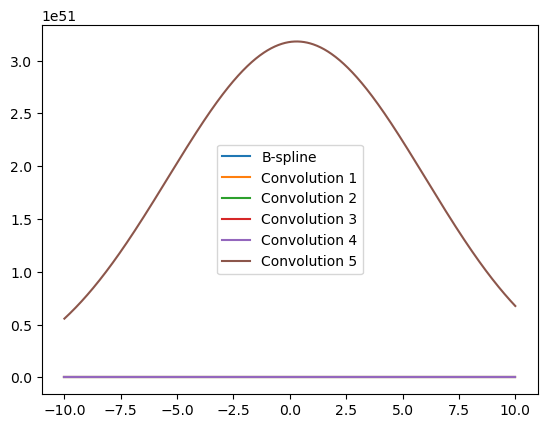

In [92]:
mean = 0
std = 1
gaussian = lambda x: 1 / (std * np.sqrt(2 * np.pi)) * np.exp(-0.5 * ((x - mean) / std) ** 2)

g = gaussian(x)

fig, ax = plt.subplots()

ax.plot(x, g, label='B-spline')

for i in range(5):
    g = np.convolve(g, g, mode='same')
    ax.plot(x, g, label=f'Convolution {i+1}')

ax.legend()

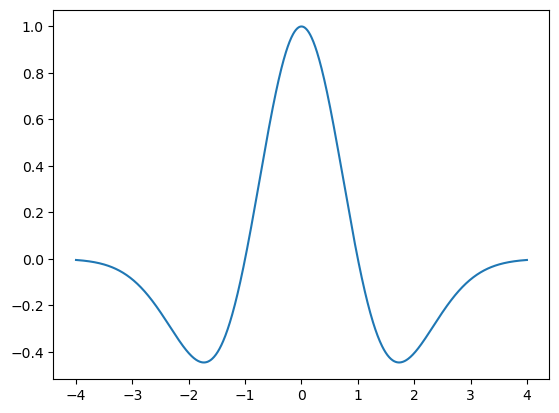

In [66]:
def mexican_hat(x):
    return (1 - x**2) * np.exp(-x**2 / 2)

y = mexican_hat(x)

plt.plot(x, y)